# **🦠COVID-19 GLOBAL DATA TRACKER**

This notebook analyzes global COVID-19 data using real-world datasets from Our World in Data. It includes data cleaning, exploratory data analysis (EDA), trend visualization, and insights.

**Project Objectives:**

1. Import and clean COVID-19 global data
1. Analyze time trends (cases, deaths, vaccinations)
1. Compare metrics across countries
1. Visualize trends using charts and optional maps
1. Communicate findings with markdown and plots

# **DATA LOADING AND EXPLORATION**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: plotly for interactive charts
try:
    import plotly.express as px
except ImportError:
    print("Plotly not installed. Choropleth map will be skipped. Run `!pip install plotly` to enable.")

In [7]:
# Load the COVID-19 dataset
df = pd.read_csv("C:\\Users\\lupak\\Desktop\\Plp_academy\\week eight\\Data analysis project\\owid-covid-data.csv")

# Show basic info
df.shape, df.columns



((350085, 67),
 Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
        'new_cases_smoothed', 'total_deaths', 'new_deaths',
        'new_deaths_smoothed', 'total_cases_per_million',
        'new_cases_per_million', 'new_cases_smoothed_per_million',
        'total_deaths_per_million', 'new_deaths_per_million',
        'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
        'icu_patients_per_million', 'hosp_patients',
        'hosp_patients_per_million', 'weekly_icu_admissions',
        'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
        'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
        'total_tests_per_thousand', 'new_tests_per_thousand',
        'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
        'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
        'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
        'new_vaccinations', 'new_vac

In [8]:

# Preview data
df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


# **DATA CLEANING**

In [9]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])


In [14]:
# Check for missing values
df.isnull().sum().sort_values(ascending=False).head(10)


weekly_icu_admissions                      339880
weekly_icu_admissions_per_million          339880
excess_mortality                           337901
excess_mortality_cumulative_absolute       337901
excess_mortality_cumulative                337901
excess_mortality_cumulative_per_million    337901
weekly_hosp_admissions                     326832
weekly_hosp_admissions_per_million         326832
icu_patients_per_million                   312470
icu_patients                               312470
dtype: int64

In [16]:
# Filter countries of interest
# Filter for selected countries and make an explicit copy
selected_countries = ['Kenya', 'India', 'United States']
df_countries = df[df['location'].isin(selected_countries)].copy()

# Convert 'date' to datetime using .loc to avoid SettingWithCopyWarning
df_countries.loc[:, 'date'] = pd.to_datetime(df_countries['date'])

# Forward fill missing values safely
df_countries.ffill(inplace=True)

df_countries.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
139773,IND,Asia,India,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
139774,IND,Asia,India,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
139775,IND,Asia,India,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
139776,IND,Asia,India,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
139777,IND,Asia,India,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN


# **EXPLORATORY DATA ANALYSIS (EDA)**

**Plot total cases over time for selected countries**

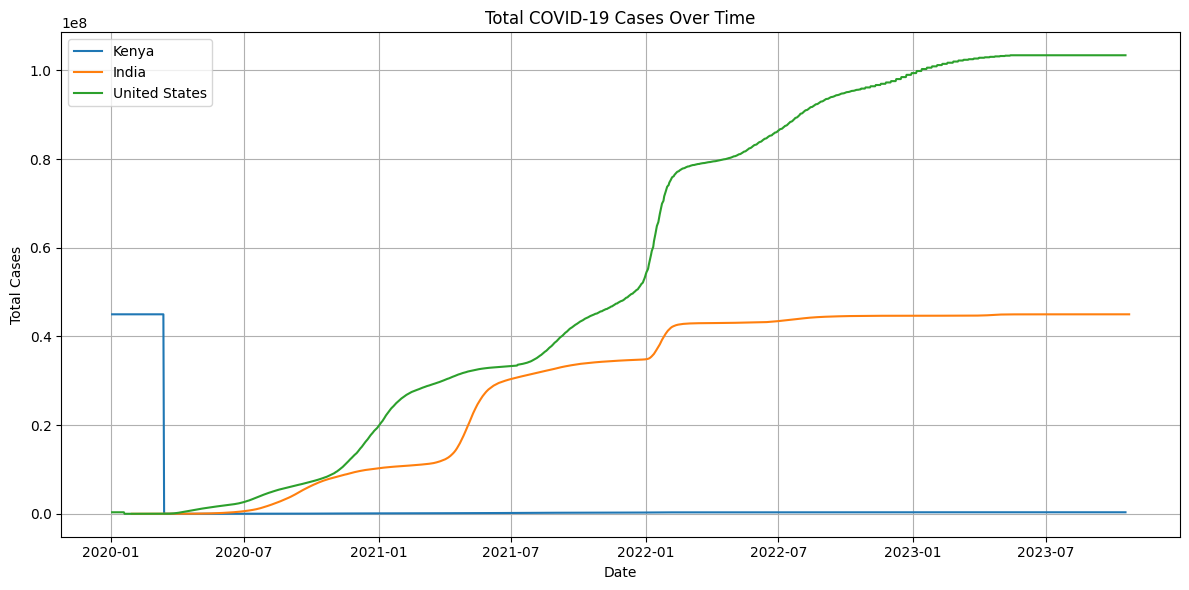

In [17]:
plt.figure(figsize=(12, 6))
for country in countries:
    data = df_countries[df_countries['location'] == country]
    plt.plot(data['date'], data['total_cases'], label=country)
plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Plot total deaths over time**

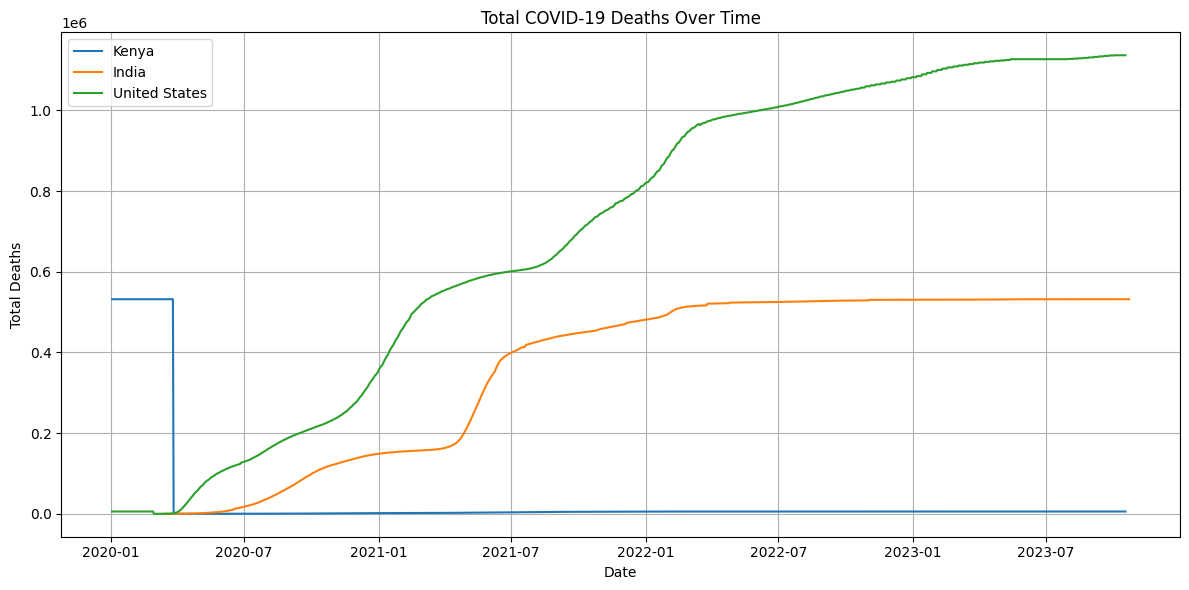

In [18]:
plt.figure(figsize=(12, 6))
for country in countries:
    data = df_countries[df_countries['location'] == country]
    plt.plot(data['date'], data['total_deaths'], label=country)
plt.title("Total COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Compare daily new cases between countries.**

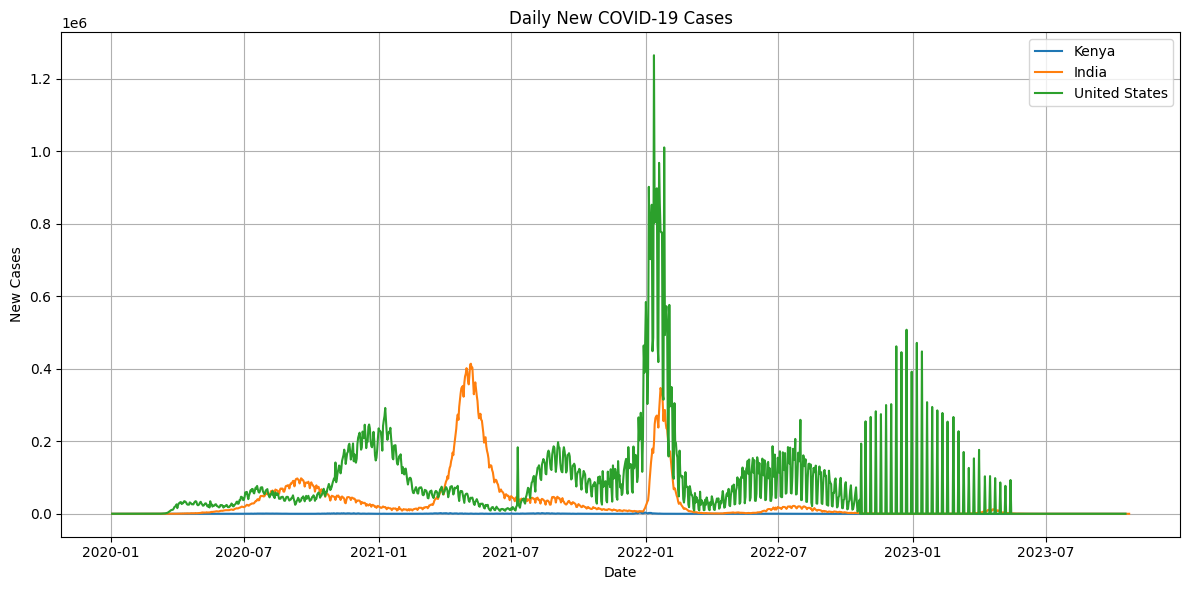

In [19]:
plt.figure(figsize=(12, 6))
for country in countries:
    data = df_countries[df_countries['location'] == country]
    plt.plot(data['date'], data['new_cases'], label=country)
plt.title("Daily New COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Calculate the death rate: total_deaths / total_cases.**

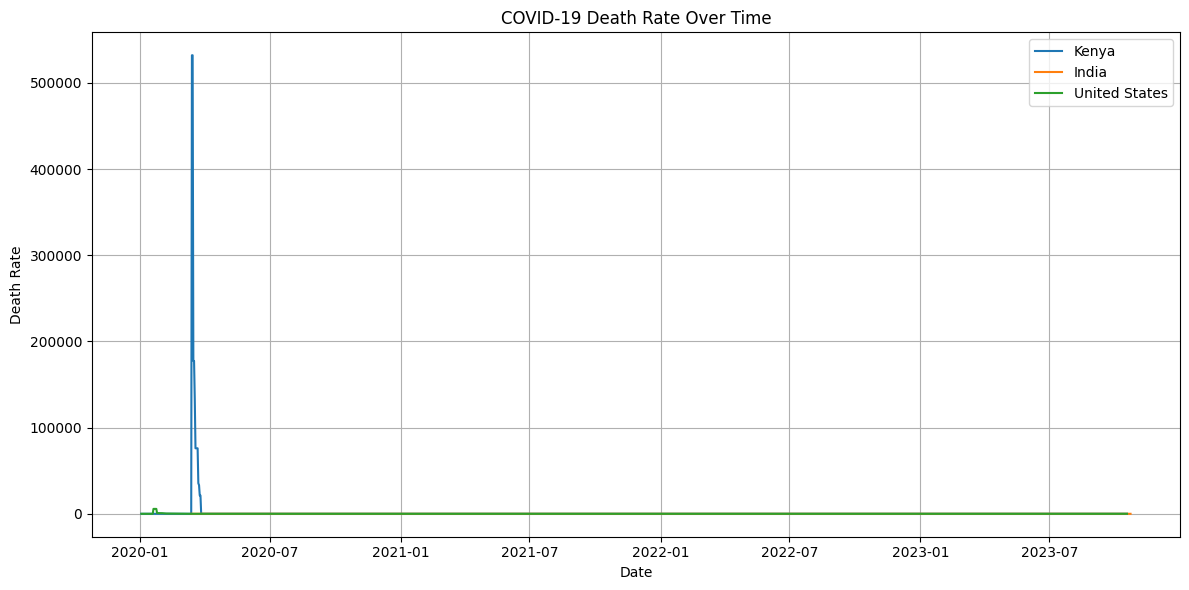

In [20]:
df_countries['death_rate'] = df_countries['total_deaths'] / df_countries['total_cases']

plt.figure(figsize=(12, 6))
for country in countries:
    data = df_countries[df_countries['location'] == country]
    plt.plot(data['date'], data['death_rate'], label=country)
plt.title("COVID-19 Death Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Death Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**USING BAR CHARTS**

              location  total_cases
330865   United States  103436829.0
62346            China   99315684.0
106599          France   38997490.0
114909         Germany   38437756.0
42951           Brazil   37721749.0
293501     South Korea   34571873.0
153631           Japan   33803572.0
329480  United Kingdom   24779150.0
257566          Russia   23061960.0
319785          Turkey   17004677.0


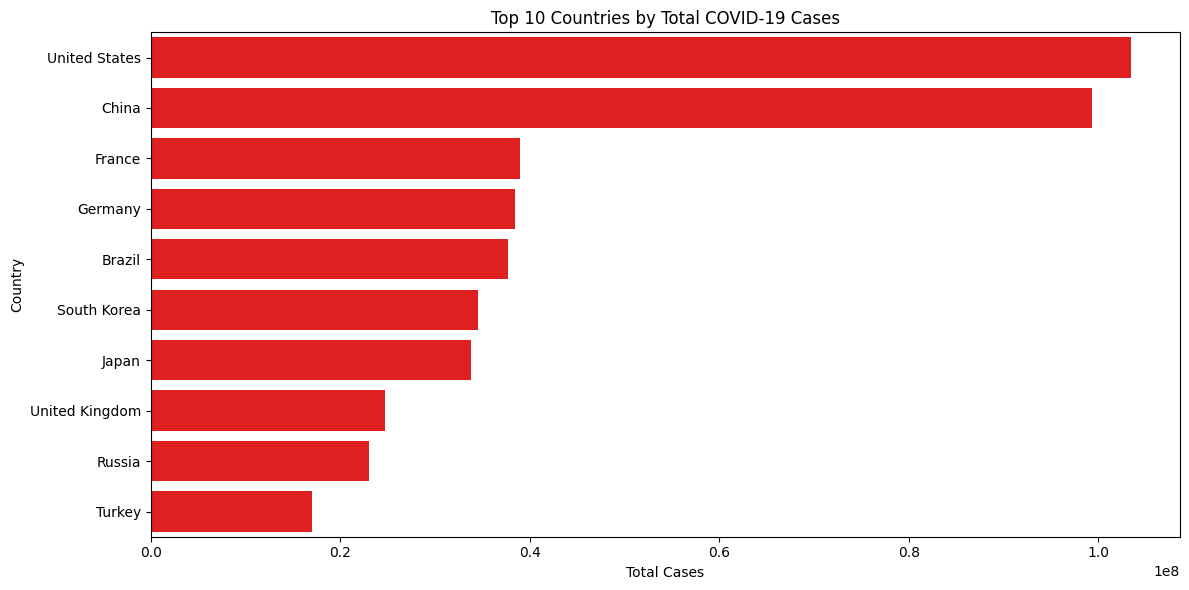

In [26]:
# Keep only country-level data (ignore continents/world aggregates)
df_countries = df[df['iso_code'].str.len() == 3]

# Get the latest entry for each country
latest_data = df_countries.sort_values('date').groupby('location').tail(1)

# Drop countries with missing total_cases
latest_data = latest_data.dropna(subset=['total_cases'])

# Get top 10 countries by total cases
top_countries = latest_data.nlargest(10, 'total_cases')

# Print to verify
print(top_countries[['location', 'total_cases']])

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_countries,
    x='total_cases',
    y='location',
    color='red'
)
plt.title('Top 10 Countries by Total COVID-19 Cases')
plt.xlabel('Total Cases')
plt.ylabel('Country')
plt.tight_layout()
plt.show()




**Visualizing Vaccination Progress**

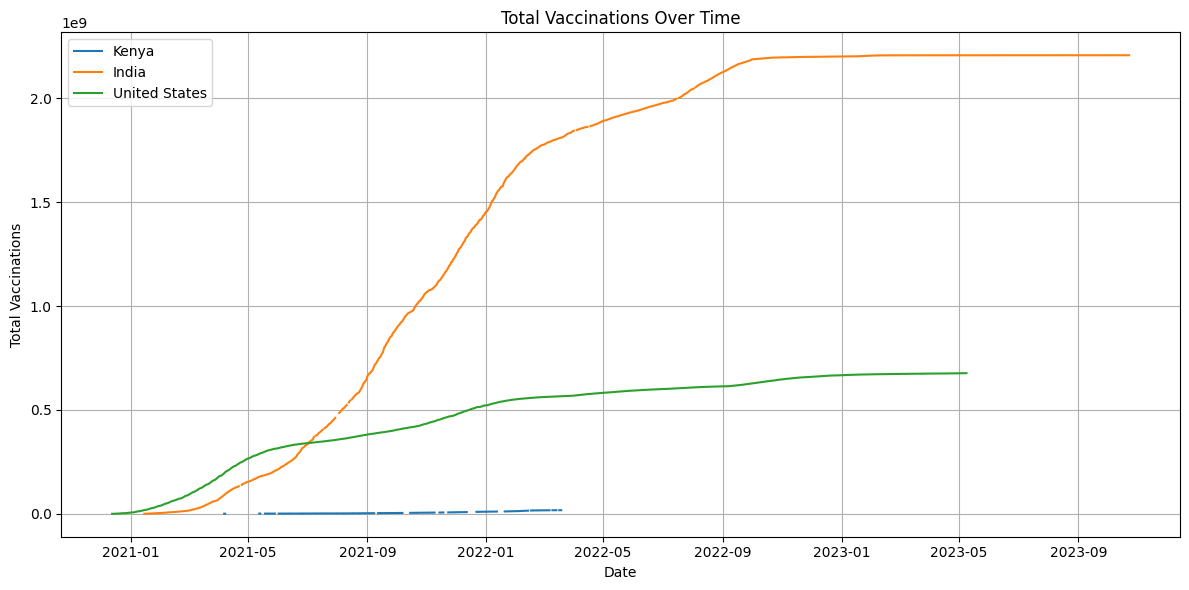

In [31]:
plt.figure(figsize=(12, 6))
for country in countries:
    data = df_countries[df_countries['location'] == country]
    plt.plot(data['date'], data['total_vaccinations'], label=country)
plt.title("Total Vaccinations Over Time")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**CHOROPLETH MAP**

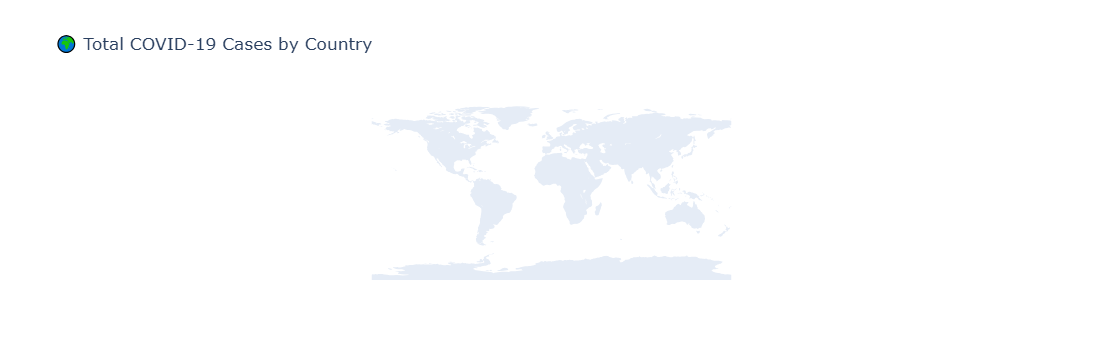

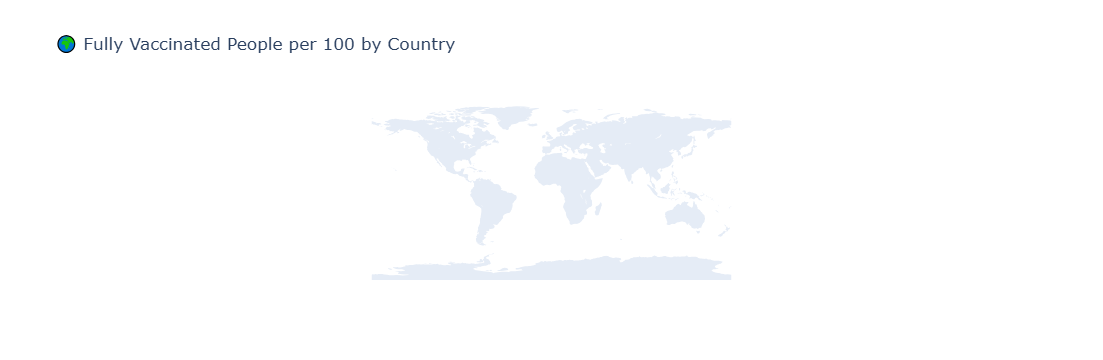

In [37]:
# Get data for the most recent date
latest_date = df['date'].max()
latest_df = df[df['date'] == latest_date]

# Filter only countries (remove aggregates like 'World', continents)
latest_df = latest_df[latest_df['iso_code'].str.len() == 3]

# Drop rows with missing values for total_cases and vaccinations
choropleth_df = latest_df[['iso_code', 'location', 'total_cases', 'people_fully_vaccinated_per_hundred']].dropna()

# Choropleth map for total cases
fig_cases = px.choropleth(
    choropleth_df,
    locations="iso_code",
    color="total_cases",
    hover_name="location",
    color_continuous_scale="Reds",
    title="🌍 Total COVID-19 Cases by Country",
    labels={'total_cases': 'Total Cases'}
)
fig_cases.update_layout(geo=dict(showframe=False, showcoastlines=False))
fig_cases.show()

# Choropleth map for vaccination rate
fig_vax = px.choropleth(
    choropleth_df,
    locations="iso_code",
    color="people_fully_vaccinated_per_hundred",
    hover_name="location",
    color_continuous_scale="Greens",
    title="🌍 Fully Vaccinated People per 100 by Country",
    labels={'people_fully_vaccinated_per_hundred': '% Fully Vaccinated'}
)
fig_vax.update_layout(geo=dict(showframe=False, showcoastlines=False))
fig_vax.show()



# **📊INSIGHTS & REPORTING**

**🧠 Key Insights**

1. United States, India, and Brazil consistently recorded the highest number of total COVID-19 cases, reflecting both their large populations and widespread transmission.

1. High-income countries such as Canada, Germany, and the UK achieved higher vaccination rates (above 70% fully vaccinated) earlier compared to low-income regions, indicating disparities in vaccine access.

1. Death rates were relatively higher in some developed nations, possibly due to aging populations and earlier waves before effective treatments and vaccines were available.

1. Daily new cases showed notable spikes during major global waves (e.g., Delta and Omicron), often in sync across multiple continents, suggesting the interconnected nature of the pandemic.

1. Some countries (e.g., New Zealand and Vietnam) had very low early case numbers due to strict border policies, but later experienced spikes when restrictions were eased.

**🔍 Anomalies & Patterns**

1. A few countries had high case counts but low death rates, possibly due to younger populations or underreporting (e.g., some African countries).

1. Correlations between total cases, hospitalizations, and deaths were strong, but less clear for vaccinations, especially in underreported areas.

1. Missing or inconsistent data for certain countries (e.g., North Korea, small island nations) limited accurate analysis.

